<a href="https://colab.research.google.com/github/ruforavishnu/attempting_kaggle_2025_santa_competition/blob/main/02_polygon_representation_and_collision_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
square = [ (0,0),  (2,0),  (2,2),  (0,2)  ]



In [3]:
def plot_polygon(points, color='blue', label='Polygon'):
  xs = [ p[0]  for p in points]  + [ points[0][0] ]
  ys = [ p[1] for p in points] + [ points[0][1]  ]

  plt.plot(xs, ys,  color=color,  linewidth=2,  label=label)


  plt.scatter(xs, ys, color=color)

  plt.gca().set_aspect('equal',  adjustable='box')



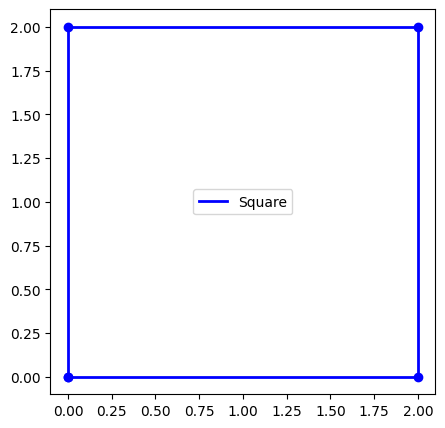

In [4]:
plt.figure(figsize=(5,5))
plot_polygon(square,  color='blue', label='Square')
plt.legend()
plt.show()


### Get Edges of a Polygon

In [9]:
def get_edges(points):
  edges = []
  num_points = len(points)

  for i in range(num_points):
    x1, y1 = points[i]

    x2, y2= points[ (i+1) % num_points ]

    edge = (x2 - x1,  y2 - y1)
    edges.append(edge)

  return edges


### Compute Normals (Perpendicular vectors)

In [6]:
def get_normals(edges):

  normals = []


  for (x,y) in edges:

    nx, ny = -y, x

    length = np.hypot(nx, ny)

    if length != 0:
      nx /= length
      ny /= length


    normals.append( (nx,ny)   )

  return normals



##### Test With Our Square

In [10]:
edges = get_edges(square)

normals = get_normals(edges)

edges, normals



([(2, 0), (0, 2), (-2, 0), (0, -2)],
 [(np.float64(0.0), np.float64(1.0)),
  (np.float64(-1.0), np.float64(0.0)),
  (np.float64(0.0), np.float64(-1.0)),
  (np.float64(1.0), np.float64(0.0))])

### Implement projection function

In [11]:
def project_polygon(points, axis):

  projections = []

  ax, ay = axis


  for (x,y) in points:

    projection = x * ax   +  y * ay
    projections.append(projection)


  return min(projections),  max(projections)




In [16]:
axis = normals[0]

project_polygon(square,  axis)


axis, project_polygon(square,  axis)




((np.float64(0.0), np.float64(1.0)), (np.float64(0.0), np.float64(2.0)))

In [17]:
def plot_edges(points,  color='green'):
  edges = get_edges(points)

  for (x,y)  , (ex, ey) in zip(points, edges):
    plt.arrow(x, y,  ex, ey, head_width=0.1,  color=color)



In [19]:
def plot_normals(points, scale=0.5,  color='red'):

  edges = get_edges(points)
  normals = get_normals(edges)

  for (x,y) , (ex,ey) , (nx,ny) in zip(points, edges, normals):

    mid_x = x + ex/2
    mid_y = y + ey/2

    plt.arrow(mid_x, mid_y, nx*scale,  ny*scale,  head_width=0.1, color=color)



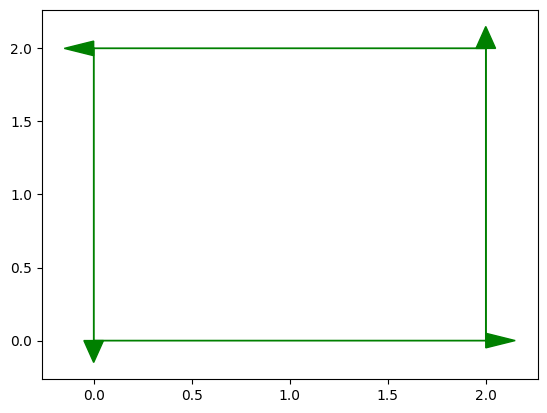

In [21]:
plot_edges(square, color='green')

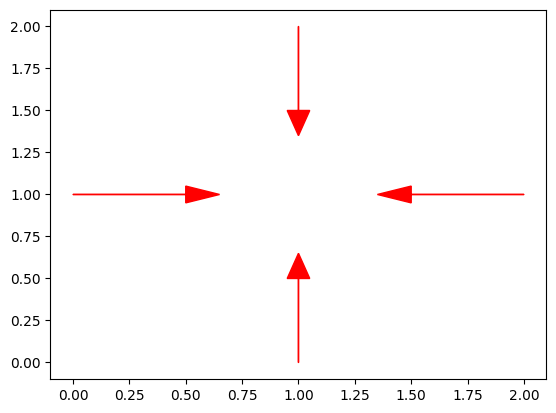

In [22]:
plot_normals(square)

In [23]:
def plot_polygon_edges_and_normals(points):
  plt.figure(figsize=(6,6))

  plot_polygon(points, color='blue', label='Polygon')
  plot_edges(points, color='green')
  plot_normals(points, color='red')


  plt.title('Polygon with Edges (green) and Normals (red)')
  plt.legend()
  plt.gca().set_aspect('equal')
  plt.show()

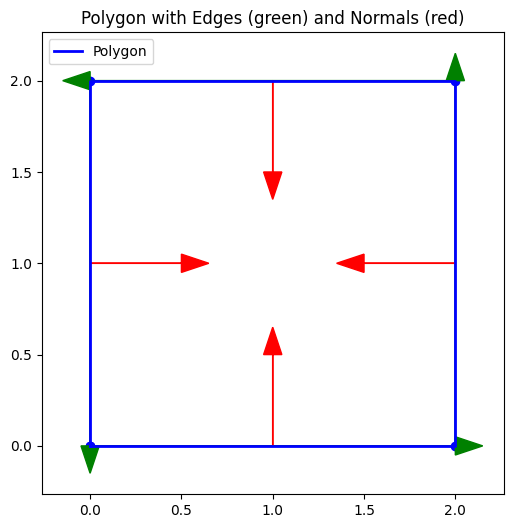

In [24]:
plot_polygon_edges_and_normals(square)

### Separating Axis Theorem (SAT) Collision Detection

In [25]:
def intervals_overlap(minA, maxA,  minB, maxB):
  return not (maxA < minB or maxB < minA)



In [26]:
def sat_collision(polyA, polyB):
  axes = []

  edgesA = get_edges(polyA)
  axes += get_normals(edgesA)

  edgesB = get_edges(polyB)
  axes += get_normals(edgesB)



  for axis in axes:

    minA, maxA = project_polygon(polyA, axis)
    minB, maxB = project_polygon(polyB, axis)


    if not intervals_overlap(minA, maxA, minB, maxB):
      return False

  return True



In [27]:
square1 = [ (0,0),  (2,0),  (2,2),  (0,2) ]
square2 = [ (1,1), (3,1), (3,3), (1,3)  ]

sat_collision(square1, square2)



True

In [28]:
square3 = [(5,5), (7,5), (7,7), (5,7)]
sat_collision(square1, square3)


False

In [29]:
def plot_two_polygons(polyA, polyB, title='Polygon collision test'):
  plt.figure( figsize= (6,6) )

  plot_polygon(polyA, color='blue', label='Polygon A')

  plot_polygon(polyB, color='orange',  label='Polygon B')

  plt.title(title)
  plt.legend()
  plt.gca().set_aspect('equal')
  plt.show()



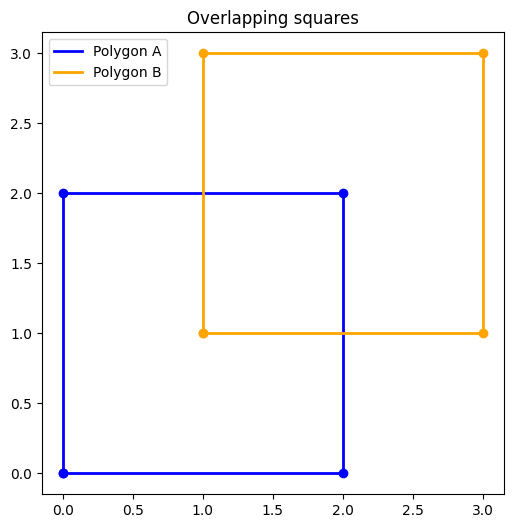

SAT collision : True


In [30]:
plot_two_polygons(square1, square2, title='Overlapping squares')
print('SAT collision :', sat_collision(square1, square2))

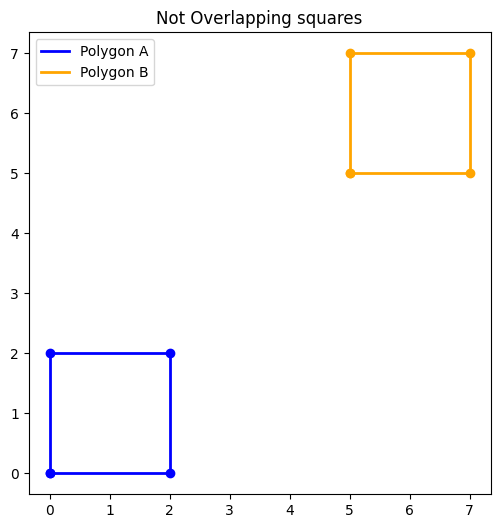

SAT collision : False


In [31]:
plot_two_polygons(square1, square3, title='Not Overlapping squares')
print('SAT collision :', sat_collision(square1, square3))